In [3]:
!pip install catboost

     |████████████████████████████████| 67.3MB 57kB/s 


In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split as tts, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, accuracy_score
from lightgbm.sklearn import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, HistGradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor 
from catboost import CatBoostRegressor

In [5]:
cleaned_train_data = pd.read_csv('garments_cleaned_train_data.csv')
cleaned_train_data.head()

,wip,incentive,quarter,department,day,team,targeted_productivity,smv,over_time,no_of_style_change,actual_productivity
0,5.769457,9.899495,0.0,3.0,0.0,8.0,0.80,26.16,7080.0,0.0,0.940725
1,6.079151,0.000000,1.0,3.0,0.0,1.0,0.75,3.94,960.0,0.0,0.886500
2,5.577876,7.071068,0.0,3.0,0.0,11.0,0.80,11.41,3660.0,0.0,0.800570
3,5.577876,7.071068,0.0,3.0,0.0,12.0,0.80,11.41,3660.0,0.0,0.800570
4,5.848527,7.071068,0.0,3.0,0.0,6.0,0.80,25.90,1920.0,0.0,0.800382


In [6]:
X = cleaned_train_data.drop("actual_productivity", 1)
y = cleaned_train_data["actual_productivity"]

X_train,X_test,y_train,y_test = tts(X,y,test_size=0.15, random_state=42)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [7]:
def evaluate(model, X_test, y_test):
    print("Validation results")
    y_pred = model.predict(X_test)
    print('Model Performance')
    print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))  
    print('Mean Squared Error:', mean_squared_error(y_test, y_pred))   
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))
    print('r2_score: ', r2_score(y_test,y_pred))
    VIL = 1/(1-(r2_score(y_test,y_pred)))
    print("Variance Inflation Factor (VIL): {:0.6f}% ".format(VIL))
    
        

    return evaluate

In [8]:
def evaluate_train(model, X_train, y_train):
  print("Train results")
  y_pred = model.predict(X_train)
  print('Mean Absolute Error:', mean_absolute_error(y_train, y_pred))  
  print('Mean Squared Error:', mean_squared_error(y_train, y_pred))   
  print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_train, y_pred)))
  print('r2_score: ', r2_score(y_train,y_pred))
  VIL = 1/(1-(r2_score(y_train,y_pred)))
  print("Variance Inflation Factor (VIL): {:0.6f}% ".format(VIL))

  return evaluate_train

#Note :- To check how I chose the hyperparameters so that I can input the appropriate ranges of different hyperparameters in RandomizedSearchCV please open file : Productivity Prediction System complete code.

#Decision Tree Regressor

##1st attempt

In [9]:
dtree1 = DecisionTreeRegressor(random_state=42)
dtree1.fit(X_train, y_train)
evaluate_train(dtree1, X_train, y_train)
print("=============================================")
evaluate(dtree1, X_test, y_test)

Train results
Mean Absolute Error: 6.671957082379991e-05
Mean Squared Error: 1.6921897393678657e-08
Root Mean Squared Error: 0.00013008419348129371
r2_score:  0.999999462299014
Variance Inflation Factor (VIL): 1859769.697497% 
Validation results
Model Performance
Mean Absolute Error: 0.05149015562763076
Mean Squared Error: 0.010115002461664932
Root Mean Squared Error: 0.10057336855084914
r2_score:  0.5853813783226092
Variance Inflation Factor (VIL): 2.411855% 


<function __main__.evaluate>

##2nd Attempt

In [ ]:
min_samples_splits = np.linspace(0.1, 0.7, num=10, endpoint=True)
min_samples_leaf = np.linspace(0.1, 0.4, num=5, endpoint=True)
dt = DecisionTreeRegressor(random_state=42)
random_dt_parameters = ({'criterion' : ['mse', 'friedman_mse', 'mae'],
                         'splitter' : ['best', 'random'],
                            'min_samples_split' : min_samples_splits,
                            'max_depth' : [8,10,12,15,20,24,32],
                            'min_samples_leaf' : [2,3,5],
                            'max_features' : ['auto', 'sqrt', 'log2', 5,6,7,10],
                            'min_samples_leaf' : min_samples_leaf})

random_search_dt = RandomizedSearchCV(dt, param_distributions= random_dt_parameters, n_iter=100, cv=8)
random_search_dt.fit(X_train,y_train)

random_search_dt.best_estimator_

In [10]:
dtree2 = DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=10,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=0.1,
                      min_samples_split=0.23333333333333334,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')
dtree2.fit(X_train,y_train)
evaluate_train(dtree2, X_train, y_train)
print("=============================================")
evaluate(dtree2, X_test, y_test)

Train results
Mean Absolute Error: 0.10103009769497501
Mean Squared Error: 0.01821948204177854
Root Mean Squared Error: 0.13497956157055238
r2_score:  0.4210676717115137
Variance Inflation Factor (VIL): 1.727318% 
Validation results
Model Performance
Mean Absolute Error: 0.09050470040619266
Mean Squared Error: 0.014414704227731489
Root Mean Squared Error: 0.12006125198302527
r2_score:  0.4091346174714091
Variance Inflation Factor (VIL): 1.692433% 


<function __main__.evaluate>

#RandomForestRegressor

##1st Attempt

In [11]:
rf1 = RandomForestRegressor(random_state=42)
rf1.fit(X_train, y_train)
print("Validation results")
evaluate_train(rf1, X_train, y_train)
print("=============================================")
evaluate(rf1, X_test, y_test)

Validation results
Train results
Mean Absolute Error: 0.014435664902810683
Mean Squared Error: 0.0006573361814939032
Root Mean Squared Error: 0.02563856824188713
r2_score:  0.9791128438696615
Variance Inflation Factor (VIL): 47.876312% 
Validation results
Model Performance
Mean Absolute Error: 0.03945967828054442
Mean Squared Error: 0.005160052516739884
Root Mean Squared Error: 0.07183350553007896
r2_score:  0.7884870645971659
Variance Inflation Factor (VIL): 4.727843% 


<function __main__.evaluate>

##2nd Attempt

In [ ]:
max_samples = [int(x) for x in np.linspace(50, 500, num=10, endpoint=True)]
est = [int(x) for x in np.linspace(100, 900, num=11, endpoint=True)]
rf2 = RandomForestRegressor(random_state=42)
random_rf_parameters = ({'n_estimators' : est,
                            'criterion' : ['mse','mae'],
                            'min_samples_split' : [0.1,0.15,0.2,0.25,0.3],
                            'max_depth' : [8,10,12,15,20,24,32],
                            'min_samples_leaf' : [2,3,5],
                            'max_features' : ['auto', 'sqrt', 'log2', 5,6,7,10],
                            'max_samples' : max_samples,
                            'min_samples_leaf' : [0.1,0.15,0.2]})

random_search_rf = RandomizedSearchCV(rf2, param_distributions= random_rf_parameters, scoring = 'neg_mean_squared_error', n_iter=100, cv=10)
random_search_rf.fit(X_train,y_train)

random_search_rf.best_estimator_

In [12]:
rf2 = RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=32, max_features=7, max_leaf_nodes=None,
                      max_samples=450, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=0.1,
                      min_samples_split=0.15, min_weight_fraction_leaf=0.0,
                      n_estimators=740, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)
rf2.fit(X_train,y_train)
print("Validation data results")
evaluate_train(rf2, X_train, y_train)
print("=============================================")
evaluate(rf2, X_test, y_test)

Validation data results
Train results
Mean Absolute Error: 0.11185387206842577
Mean Squared Error: 0.021353304486073973
Root Mean Squared Error: 0.14612769924307292
r2_score:  0.32148903824880504
Variance Inflation Factor (VIL): 1.473816% 
Validation results
Model Performance
Mean Absolute Error: 0.09463235469592472
Mean Squared Error: 0.01629634860799713
Root Mean Squared Error: 0.12765715259239152
r2_score:  0.33200514544315085
Variance Inflation Factor (VIL): 1.497018% 


<function __main__.evaluate>

#GradientBoostingRegressor

##1st Attempt

In [13]:
gbdt1 = GradientBoostingRegressor(random_state=42)
gbdt1.fit(X_train, y_train)
evaluate_train(gbdt1, X_train, y_train)
print("=====================================================")
evaluate(gbdt1, X_test, y_test)

Train results
Mean Absolute Error: 0.03868611071323854
Mean Squared Error: 0.003252383435875942
Root Mean Squared Error: 0.05702967153926052
r2_score:  0.8966540371070417
Variance Inflation Factor (VIL): 9.676237% 
Validation results
Model Performance
Mean Absolute Error: 0.04622195167995938
Mean Squared Error: 0.004937522132737147
Root Mean Squared Error: 0.07026750410208937
r2_score:  0.7976086877946128
Variance Inflation Factor (VIL): 4.940924% 


<function __main__.evaluate>

##2nd Attempt

In [ ]:
gbdt2 = GradientBoostingRegressor(random_state=42)
learning = [float(x) for x in np.linspace(0.05,0.5,num=10, endpoint=True)]
est = [int(x) for x in np.linspace(100, 900, num=20, endpoint=True)]
sample = [float(x) for x in np.linspace(0.5, 1.0, num=20, endpoint=True)]
min_samples_leafs = np.linspace(0.1, 0.2, num = 5, endpoint=True)
alpha = [float(x) for x in np.linspace(0.6, 0.7,num=5)]
min_samples_splits = [float(x) for x in np.linspace(0.1, 0.2, num=5, endpoint=True)]
random_params = ({'learning_rate' : learning,
                  'loss' : ['ls', 'lad', 'huber', 'quantile'],
                  'n_estimators' : est,
                  'subsample' : sample,
                  'criterion' : ['friedman_mse', 'mse', 'mae'],
                  'min_samples_split' : min_samples_splits,
                  'min_samples_leaf' : min_samples_leafs,
                  'max_depth' : [3,4,5,8],
                  'alpha' : alpha})

random_search_gb = RandomizedSearchCV(gbdt2, param_distributions= random_params, n_iter = 60, scoring= 'neg_mean_squared_error', cv = 5)
random_search_gb.fit(X_train, y_train)

random_search_gb.best_estimator_

In [14]:
gbdt2 = GradientBoostingRegressor(alpha=0.6499999999999999, ccp_alpha=0.0,
                          criterion='mse', init=None,
                          learning_rate=0.15000000000000002, loss='ls',
                          max_depth=8, max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=0.125, min_samples_split=0.2,
                          min_weight_fraction_leaf=0.0, n_estimators=605,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=42, subsample=0.9210526315789473,
                          tol=0.0001, validation_fraction=0.1, verbose=0,
                          warm_start=False)
gbdt2.fit(X_train, y_train)
evaluate_train(gbdt2, X_train, y_train)
print("==========================================================")
evaluate(gbdt2, X_test, y_test)

Train results
Mean Absolute Error: 0.03578009431611256
Mean Squared Error: 0.0026671371496437635
Root Mean Squared Error: 0.05164433318035739
r2_score:  0.9152505040282006
Variance Inflation Factor (VIL): 11.799480% 
Validation results
Model Performance
Mean Absolute Error: 0.05543193192596034
Mean Squared Error: 0.0063451074189529175
Root Mean Squared Error: 0.07965618255322632
r2_score:  0.7399111169362765
Variance Inflation Factor (VIL): 3.844839% 


<function __main__.evaluate>

#HistGradientBoostingRegressor (histogram based Gradient Boosting Regressor)

##1st Attempt

In [15]:
histgb1 = HistGradientBoostingRegressor(random_state=42)
histgb1.fit(X_train, y_train)
print("Training data results")
evaluate_train(histgb1, X_train, y_train)
print("=========================================================")
evaluate(histgb1, X_test, y_test)

Training data results
Train results
Mean Absolute Error: 0.01732098177623202
Mean Squared Error: 0.0008144426218842414
Root Mean Squared Error: 0.02853844112568592
r2_score:  0.9741207152726064
Variance Inflation Factor (VIL): 38.640944% 
Validation results
Model Performance
Mean Absolute Error: 0.03975976051484696
Mean Squared Error: 0.004411819150718392
Root Mean Squared Error: 0.0664215262600792
r2_score:  0.8191574957798196
Variance Inflation Factor (VIL): 5.529673% 


<function __main__.evaluate>

##2nd Attempt

In [ ]:
histgbm2 = HistGradientBoostingRegressor(random_state=42)

max_bins = [int(x) for x in np.linspace(50,255, num=10, endpoint =True)]
iter = [int(x) for x in np.linspace(100, 500, num=20, endpoint=True)]
learning = [float(x) for x in np.linspace(0.01,0.1,num=10, endpoint=True)]
min_samples_leafs = [float(x) for x in np.linspace(10, 50, num = 20, endpoint=True)]
depth = [int(x) for x in np.linspace(3,10,num=5, endpoint=True)]
ridge = [int(x) for x in np.linspace(0,500,num=300, endpoint=True)]

random_histgbm_params = ({'max_bins' : max_bins,
                'max_iter' : iter,
                'learning_rate' : learning,
                'min_samples_leaf' : min_samples_leafs,
                'max_depth' : depth,
                'l2_regularization' : ridge,
                'loss' : ['least_squares', 'least_absolute_deviation', 'poisson']})
random_search_histgbm = RandomizedSearchCV(estimator = histgbm2, param_distributions = random_histgbm_params, scoring= 'neg_mean_squared_error', cv = 10, n_jobs = -1, n_iter = 100)
random_search_histgbm.fit(X_train, y_train)

random_search_histgbm.best_estimator_

I again tuned n_estimators and l2_regularization and the overfitting got reduced by 1% from difference of 12 to 11 but it is still to much

In [16]:
histgbm2 = HistGradientBoostingRegressor(l2_regularization=320, learning_rate=0.1,
                              loss='least_squares', max_bins=141, max_depth=8,
                              max_iter=336, max_leaf_nodes=31,
                              min_samples_leaf=18.421052631578945,
                              n_iter_no_change=None, random_state=42,
                              scoring='neg_mean_squared_error', tol=1e-07, validation_fraction=0.1,
                              verbose=0, warm_start=False)
histgbm2.fit(X_train,y_train)
print("Training data results")
evaluate_train(histgbm2, X_train, y_train)
print("Validation data results")
evaluate(histgbm2, X_test, y_test)

Training data results
Train results
Mean Absolute Error: 0.030914426043823526
Mean Squared Error: 0.0025262855426562937
Root Mean Squared Error: 0.050262168105408005
r2_score:  0.9197261279010114
Variance Inflation Factor (VIL): 12.457353% 
Validation data results
Validation results
Model Performance
Mean Absolute Error: 0.04353389043210393
Mean Squared Error: 0.004873152406133841
Root Mean Squared Error: 0.06980796807051357
r2_score:  0.800247232611894
Variance Inflation Factor (VIL): 5.006188% 


<function __main__.evaluate>

#CatBoost Regressor

##1st Attempt

In [17]:
catboost1 = CatBoostRegressor(random_seed=42)
catboost1.fit(X_train, y_train)
evaluate_train(catboost1, X_train, y_train)
evaluate(catboost1, X_test, y_test)

Learning rate set to 0.039147
0:	learn: 0.1737688	total: 47.4ms	remaining: 47.3s
1:	learn: 0.1706855	total: 48.7ms	remaining: 24.3s
2:	learn: 0.1675576	total: 50ms	remaining: 16.6s
3:	learn: 0.1645799	total: 51.2ms	remaining: 12.8s
4:	learn: 0.1617346	total: 52.3ms	remaining: 10.4s
5:	learn: 0.1589060	total: 53.6ms	remaining: 8.88s
6:	learn: 0.1558424	total: 54.9ms	remaining: 7.78s
7:	learn: 0.1528596	total: 56.1ms	remaining: 6.96s
8:	learn: 0.1504134	total: 57.3ms	remaining: 6.31s
9:	learn: 0.1476810	total: 58.5ms	remaining: 5.79s
10:	learn: 0.1453140	total: 59.7ms	remaining: 5.37s
11:	learn: 0.1429369	total: 60.9ms	remaining: 5.01s
12:	learn: 0.1407596	total: 62.1ms	remaining: 4.71s
13:	learn: 0.1385553	total: 63.3ms	remaining: 4.46s
14:	learn: 0.1368660	total: 64.4ms	remaining: 4.23s
15:	learn: 0.1349924	total: 65.4ms	remaining: 4.02s
16:	learn: 0.1328001	total: 66.6ms	remaining: 3.85s
17:	learn: 0.1306931	total: 67.8ms	remaining: 3.7s
18:	learn: 0.1283603	total: 68.9ms	remaining: 3

<function __main__.evaluate>

##2nd Attempt

I just randomly passed some values to randomized search cv and got better results than any other model.

In [ ]:
cat = CatBoostRegressor(random_seed=42)

random_cat_params = ({'iterations': [100, 150, 200],
                          'learning_rate': [0.03, 0.1],
                          'depth': [2, 4, 6, 8],
                          'l2_leaf_reg': [0.2, 0.5, 1, 3]})
random_search_cat = RandomizedSearchCV(estimator = cat, param_distributions = random_cat_params, scoring= 'neg_mean_squared_error', cv = 5, n_jobs = -1, n_iter = 60)
random_search_cat.fit(X_train, y_train)

random_search_cat.best_estimator_

In [18]:
catboost2 = CatBoostRegressor(random_seed=42, depth = 6, iterations = 200, l2_leaf_reg = 35, learning_rate = 0.1)
catboost2.fit(X_train, y_train)
evaluate_train(catboost2, X_train, y_train)
evaluate(catboost2, X_test, y_test)

0:	learn: 0.1713600	total: 1.18ms	remaining: 234ms
1:	learn: 0.1667670	total: 2.85ms	remaining: 282ms
2:	learn: 0.1627585	total: 4.08ms	remaining: 268ms
3:	learn: 0.1580195	total: 5.26ms	remaining: 258ms
4:	learn: 0.1545087	total: 6.49ms	remaining: 253ms
5:	learn: 0.1505841	total: 7.67ms	remaining: 248ms
6:	learn: 0.1467928	total: 8.83ms	remaining: 244ms
7:	learn: 0.1434664	total: 10.1ms	remaining: 242ms
8:	learn: 0.1405726	total: 11.3ms	remaining: 239ms
9:	learn: 0.1377840	total: 12.4ms	remaining: 235ms
10:	learn: 0.1351741	total: 13.6ms	remaining: 234ms
11:	learn: 0.1317882	total: 14.8ms	remaining: 232ms
12:	learn: 0.1293949	total: 16ms	remaining: 230ms
13:	learn: 0.1271666	total: 17.1ms	remaining: 227ms
14:	learn: 0.1254264	total: 18.3ms	remaining: 226ms
15:	learn: 0.1234811	total: 19.5ms	remaining: 224ms
16:	learn: 0.1217375	total: 20.6ms	remaining: 222ms
17:	learn: 0.1197150	total: 21.8ms	remaining: 220ms
18:	learn: 0.1174062	total: 22.9ms	remaining: 218ms
19:	learn: 0.1162653	tot

<function __main__.evaluate>

##3rd Attempt

In [19]:
catboost3 = CatBoostRegressor(random_seed=42, depth = 6, iterations = 200, l2_leaf_reg = 35, learning_rate = 0.1, random_strength=0.75, bootstrap_type = 'MVS', subsample=0.8)
catboost3.fit(X_train, y_train)
evaluate_train(catboost3, X_train, y_train)
evaluate(catboost3, X_test, y_test)

0:	learn: 0.1714357	total: 1.12ms	remaining: 222ms
1:	learn: 0.1662647	total: 4.63ms	remaining: 459ms
2:	learn: 0.1619927	total: 6.82ms	remaining: 448ms
3:	learn: 0.1571981	total: 7.91ms	remaining: 388ms
4:	learn: 0.1531733	total: 10.4ms	remaining: 405ms
5:	learn: 0.1493175	total: 11.5ms	remaining: 372ms
6:	learn: 0.1456382	total: 12.6ms	remaining: 349ms
7:	learn: 0.1425236	total: 13.8ms	remaining: 331ms
8:	learn: 0.1391592	total: 14.9ms	remaining: 317ms
9:	learn: 0.1365989	total: 16.1ms	remaining: 305ms
10:	learn: 0.1334332	total: 17.2ms	remaining: 296ms
11:	learn: 0.1300767	total: 18.4ms	remaining: 288ms
12:	learn: 0.1270587	total: 19.5ms	remaining: 280ms
13:	learn: 0.1248631	total: 20.6ms	remaining: 274ms
14:	learn: 0.1232112	total: 21.8ms	remaining: 269ms
15:	learn: 0.1209969	total: 22.9ms	remaining: 264ms
16:	learn: 0.1184736	total: 24ms	remaining: 259ms
17:	learn: 0.1167952	total: 25.2ms	remaining: 254ms
18:	learn: 0.1148525	total: 27.1ms	remaining: 258ms
19:	learn: 0.1132591	tot

<function __main__.evaluate>

##4th Attempt

This tuned catboost worked best until now with r2 score gap of 0.0431 which can be accepted. Now my R2 score for train is 90.44 and validation is 86.13

*   rsm(Random Subspace Method) :- It is the total percentage of columns to use for each split, generally it is not recommended to use this with few number of columns but i used and i got slightly better results as compared to when i did not used.
*   bootstrap_type = MVS :- MVS can be considered as imporoved version of GOSS(Gradient based One Side Sampling). This is one of the two technique used in LightGBM which is also an improved version of Gradient Boosting.

*   subsample :- The percentage of samples to be used for bootstraping. In my case bootstrap strategy is MVs(Minimum Variance Sampling).

In [20]:
catboost4 = CatBoostRegressor(random_seed=42, depth = 6, iterations = 155, l2_leaf_reg = 40, learning_rate = 0.1, random_strength=0.8, bootstrap_type = 'MVS', subsample=0.8,
                             rsm = 0.6)
catboost4.fit(X_train, y_train)
evaluate_train(catboost4, X_train, y_train)
evaluate(catboost4, X_test, y_test)

0:	learn: 0.1728703	total: 1.02ms	remaining: 157ms
1:	learn: 0.1679890	total: 2.78ms	remaining: 213ms
2:	learn: 0.1640514	total: 3.99ms	remaining: 202ms
3:	learn: 0.1594140	total: 5.2ms	remaining: 196ms
4:	learn: 0.1561645	total: 6.25ms	remaining: 188ms
5:	learn: 0.1519412	total: 7.21ms	remaining: 179ms
6:	learn: 0.1485201	total: 8.4ms	remaining: 178ms
7:	learn: 0.1451470	total: 9.39ms	remaining: 173ms
8:	learn: 0.1424373	total: 10.5ms	remaining: 170ms
9:	learn: 0.1403123	total: 11.5ms	remaining: 167ms
10:	learn: 0.1377209	total: 12.5ms	remaining: 164ms
11:	learn: 0.1352732	total: 13.5ms	remaining: 161ms
12:	learn: 0.1334389	total: 14.3ms	remaining: 156ms
13:	learn: 0.1313889	total: 15.4ms	remaining: 155ms
14:	learn: 0.1286604	total: 16.1ms	remaining: 150ms
15:	learn: 0.1253974	total: 17.2ms	remaining: 149ms
16:	learn: 0.1234893	total: 18.2ms	remaining: 148ms
17:	learn: 0.1216831	total: 19.1ms	remaining: 145ms
18:	learn: 0.1202945	total: 20.2ms	remaining: 145ms
19:	learn: 0.1187628	tot

<function __main__.evaluate>

In [21]:
feature_importance_catboost=pd.DataFrame(np.hstack((np.array([X.columns]).T, catboost4.feature_importances_.T.reshape(-1,1))), columns=['feature', 'importance'])
feature_importance_catboost['importance']=pd.to_numeric(feature_importance_catboost['importance'])
feature_importance_catboost.sort_values(by='importance', ascending=False)

,feature,importance
0,wip,37.993757
3,department,16.871662
1,incentive,14.251806
2,quarter,10.847923
7,smv,8.473461
6,targeted_productivity,7.934835
5,team,2.034786
8,over_time,0.742236
9,no_of_style_change,0.483893
4,day,0.365641


wip column had highly missing values but I did not deleted it because I thought this can be the important column, so I imputed it with MICE imputation and my catboost model found it most important column to predict the productivity.

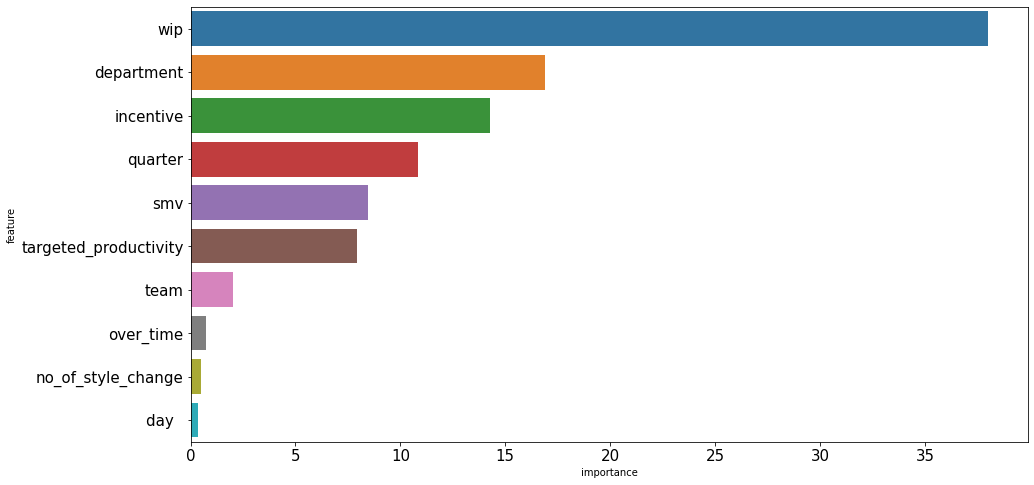

In [22]:
plt.figure(figsize = (15,8))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
sns.barplot(x = 'importance', y = 'feature', data = feature_importance_catboost, 
            order = feature_importance_catboost.sort_values('importance', ascending=False).feature)

In [23]:
model_comparison_table = pd.DataFrame()
model_comparison_table['model'] = ['Decision Tree Regressor1', 'Decision Tree Regressor2', 'Random Forest Regressor1', 'Random Forest Regressor2',
                                   'Gradient Boosting Regressor1', 'Gradient Boosting Regressor2', 'HistGradientBoostingRegressor1', 'HistGradientBoostingRegressor2',
                                   'CatBoostRegressor1', 'CatBoostRegressor2', 'CatBoostRegressor3', 'CatBoostRegressor4']

model_comparison_table['train R2 score'] = [r2_score(y_train, dtree1.predict(X_train)), r2_score(y_train, dtree2.predict(X_train)),
                                            r2_score(y_train, rf1.predict(X_train)), r2_score(y_train, rf2.predict(X_train)),
                                            r2_score(y_train, gbdt1.predict(X_train)), r2_score(y_train, gbdt2.predict(X_train)),
                                            r2_score(y_train, histgb1.predict(X_train)), r2_score(y_train, histgbm2.predict(X_train)),
                                            r2_score(y_train, catboost1.predict(X_train)), r2_score(y_train, catboost2.predict(X_train)),
                                            r2_score(y_train, catboost3.predict(X_train)), r2_score(y_train, catboost4.predict(X_train))]

model_comparison_table['validation R2 score'] = [r2_score(y_test, dtree1.predict(X_test)), r2_score(y_test, dtree2.predict(X_test)),
                                                  r2_score(y_test, rf1.predict(X_test)), r2_score(y_test, rf2.predict(X_test)),
                                                  r2_score(y_test, gbdt1.predict(X_test)), r2_score(y_test, gbdt2.predict(X_test)),
                                                  r2_score(y_test, histgb1.predict(X_test)), r2_score(y_test, histgbm2.predict(X_test)),
                                                  r2_score(y_test, catboost1.predict(X_test)), r2_score(y_test, catboost2.predict(X_test)),
                                                  r2_score(y_test, catboost3.predict(X_test)), r2_score(y_test, catboost4.predict(X_test))]

model_comparison_table['R2 score difference'] = model_comparison_table['train R2 score'] - model_comparison_table['validation R2 score']

model_comparison_table

,model,train R2 score,validation R2 score,R2 score difference
0,Decision Tree Regressor1,0.999999,0.585381,0.414618
1,Decision Tree Regressor2,0.421068,0.409135,0.011933
2,Random Forest Regressor1,0.979113,0.788487,0.190626
3,Random Forest Regressor2,0.321489,0.332005,-0.010516
4,Gradient Boosting Regressor1,0.896654,0.797609,0.099045
5,Gradient Boosting Regressor2,0.915251,0.739911,0.175339
6,HistGradientBoostingRegressor1,0.974121,0.819157,0.154963
7,HistGradientBoostingRegressor2,0.919726,0.800247,0.119479
8,CatBoostRegressor1,0.992668,0.857169,0.135499
9,CatBoostRegressor2,0.922664,0.862723,0.059941
